In [1]:
# Step 1: Importing the important libraries
"""
1. NumPy: is a general-purpose array-processing package and scientific computing package.
2. Pandas: is an open source package widely used for data science/data analysis and machine learning tasks.
3. Matplotlib: is a cross-platform, data visualization and graphical plotting library and its numerical extension NumPy.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Read the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
# Step 2.1: Exploration of the dataset
# Check the head of the dataset
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Step 2.2: Exploration of the dataset
# Check the tail of the dataset
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
# Step 2.3: Exploration of the dataset
# Check the decoration of the dataset
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
# Step 2.3: Exploration of the dataset
# Check the decoration of the dataset
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
# Step 3: Cleaning the dataset
import re

In [8]:
# Applying the data cleaning process over the single review of the dataset for better understanding before apply in whole dataset.
# Step 3.1: To check the data at specific location
dataset['Review'][0]

'Wow... Loved this place.'

In [9]:
# Step 3.2: Considerable characters in the review dataset
review = re.sub('[^a-zA-Z]',' ',dataset['Review'][0])

In [10]:
# Display the impact over the dataset
review

'Wow    Loved this place '

In [11]:
# Step 3.3: Convert all caps character to the lower character
review = review.lower()

In [12]:
# Display the impact over the dataset
review

'wow    loved this place '

In [13]:
# Step 3.4: Seperate each word in the sentence
review = review.split()

In [14]:
# Display the impact over the dataset
review

['wow', 'loved', 'this', 'place']

In [15]:
# Step 3.5: Removing the prepositions 'this, that, it, etc.' from the sentence
import nltk

# Download the stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# removing the stopwords from the review
from nltk.corpus import stopwords
review = [word for word in review if not word in set(stopwords.words('english'))] 

In [17]:
# Display the impact over the dataset
review

['wow', 'loved', 'place']

In [18]:
# Step 3.6: Steming: Convert each word to their root word like; loved --> to love.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

In [19]:
# Display the impact over the dataset
review

['wow', 'love', 'place']

In [20]:
# Step 3.7: Join all the seperated words into a single unit
review = ' '.join(review)

In [21]:
# Display the impact over the dataset
review

'wow love place'

In [22]:
# Step 4: Now applying the all clearing process to the complete dataset or the full datapoints
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
# Display the impact over an subset of dataset
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [24]:
# Step 5: Creating the bag of words model: (sparse matrix)
# Applying the word inspector to removing non relevant words or those comes very rear. (Optional)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [25]:
# View the sparce matrix which is tokenize now and work as independent varialbe to apply machine learning classification. 
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
# To get the size of bag of words matrix
np.shape(X)

(1000, 1500)

In [27]:
# Step 6: Fatching the dataset dependent (y) varialbes
y = dataset.iloc[:,1].values

In [28]:
# Step 7: Spliting of the dataset into the training and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
# Step 8: Init the Model and then apply the algo with the dataset. model : Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
# Step 8: To predict the output or dependent values over the test data through the learning model.
y_pred = classifier.predict(X_test)

In [31]:
# Step 9: Print and compare the test actual values and the predicted values through the model
y_pred, y_test

(array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1

In [32]:
# Step 10: Lets Compute the confusion matrix, accuracy score, classification report through library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print('The confusion matrix of the model:')
print(cm)
acc = accuracy_score(y_test,y_pred)
print('The accuracy score of the model:',acc)
cr = classification_report(y_test,y_pred)
print('The classification report of the model:')
print(cr)

The confusion matrix of the model:
[[55 42]
 [12 91]]
The accuracy score of the model: 0.73
The classification report of the model:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [33]:
# Step 11: Lets Compute the accuracy score and other performance metrices using sketch formulas
# A true positive: is an outcome where the model correctly predicts the positive class.
# A true negative: is an outcome where the model correctly predicts the negative class.
# A false positive: is an outcome where the model incorrectly predicts the positive class. 
# A false negative: is an outcome where the model incorrectly predicts the negative class.
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [34]:
print(cm)
print('True positive: ',TP)
print('True negative: ',TN)
print('False positive: ',FP)
print('False negative: ',TN)

[[55 42]
 [12 91]]
True positive:  55
True negative:  91
False positive:  42
False negative:  91


In [35]:
# Step 11.1: Lets Compute the following;
# Accuracy: is the fraction of predictions our model got right. (TP + TN)/(TP + FP + TN + FN)
# Precision: provides what proportion of positive identifications was actually correct? (TP)/(TP + FP)
# Recall: provides what proportion of actual positives was identified correctly? (TP)/(TP + FN)
print('The accuracy of the model is: ',(TP + TN)/(TP + FP + TN + FN))
print('Precision or Positive Predictive Value of the model is: ',(TP)/(TP + FP))
print('Sensitivity, Recall, Hit rate, or True Positive Rate of the model is: ',(TP)/(TP + FN))
print('Specificity, Selectivity or True Negative Rate of the model is: ',(TN)/TN + FP)
print('Negative Predictive Value of the model is: ',(TN)/(TN + FN))
print('Miss rate or False Negative Rate of the model is: ',(FN)/(FN + FP))
print('Fall-out or False Positive Rate of the model is: ', (FP)/(FP + TN))
print('False Discovery Rate of the model is: ', (FP)/(FP + TP))
print('False Omission Rate of the model is: ', (FN)/(FN + TN))

The accuracy of the model is:  0.73
Precision or Positive Predictive Value of the model is:  0.5670103092783505
Sensitivity, Recall, Hit rate, or True Positive Rate of the model is:  0.8208955223880597
Specificity, Selectivity or True Negative Rate of the model is:  43.0
Negative Predictive Value of the model is:  0.883495145631068
Miss rate or False Negative Rate of the model is:  0.2222222222222222
Fall-out or False Positive Rate of the model is:  0.3157894736842105
False Discovery Rate of the model is:  0.4329896907216495
False Omission Rate of the model is:  0.11650485436893204


0.7252527274547093


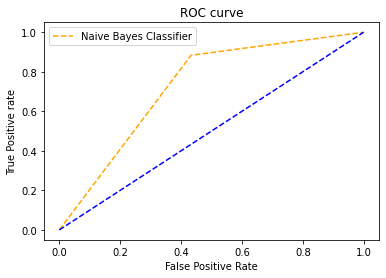

In [36]:
# Step 12: ROC (receiver operating characteristic) Curve: is a graph showing the performance of a classification model at all classification thresholds.
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [37]:
print('Congratulation: Task accomplished to design a Natual Language Processing over the review with results classify through Naive Bayes Classification.')

Congratulation: Task accomplished to design a Natual Language Processing over the review with results classify through Naive Bayes Classification.
